# HAND WRITTEN DIGIT PREDICTION -  CLASSIFICATION ANALYSIS

This project aims to recognize handwritten digits using machine learning techniques. The dataset used for this project is the MNIST dataset, a popular benchmark dataset in the field of machine learning. The goal is to train a model that can accurately classify handwritten digits from 0 to 9.

### IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from sklearn.datasets import load_digits

### LOAD DATASET

In [ ]:
df=load_digits()

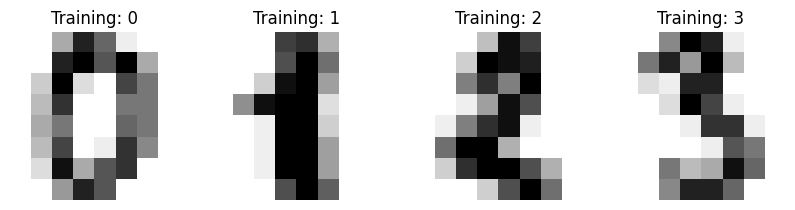

In [ ]:
 _, axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
 for ax,image,label in zip(axes,df.images,df.target):
     ax.set_axis_off()
     ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
     ax.set_title("Training: %i" % label)

### DATA PREPROCESSING

In [ ]:
#data preprocessing
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [ ]:
data[0].shape

(64,)

### SCALING IMAGE DATA

In [ ]:
data.shape

(1797, 64)

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data=data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

### TRAIN TEST SPLIT DATA

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

### RANDOM FOREST MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

### PREDICT TEST DATA

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
y_pred

array([4, 7, 1, 2, 8, 2, 4, 6, 8, 4, 2, 6, 1, 4, 4, 2, 1, 8, 2, 7, 3, 4,
       8, 6, 6, 9, 9, 8, 5, 5, 9, 0, 0, 2, 2, 3, 5, 8, 1, 0, 8, 8, 3, 7,
       1, 9, 6, 9, 1, 1, 3, 7, 1, 5, 7, 9, 8, 9, 0, 4, 5, 1, 0, 3, 2, 4,
       4, 0, 0, 0, 7, 3, 4, 2, 6, 2, 4, 6, 7, 8, 8, 1, 5, 4, 3, 6, 2, 7,
       7, 6, 6, 1, 7, 1, 8, 1, 1, 4, 3, 1, 4, 6, 7, 5, 5, 6, 6, 5, 9, 0,
       4, 4, 9, 1, 4, 1, 4, 9, 1, 3, 5, 1, 0, 2, 0, 3, 2, 2, 6, 4, 3, 6,
       8, 5, 4, 2, 9, 8, 8, 2, 5, 1, 6, 6, 8, 0, 6, 0, 4, 5, 0, 5, 5, 6,
       0, 5, 6, 4, 0, 0, 9, 1, 2, 1, 7, 9, 4, 2, 1, 0, 0, 3, 7, 1, 8, 8,
       4, 7, 1, 5, 4, 3, 0, 7, 7, 7, 5, 2, 7, 9, 0, 8, 7, 2, 6, 4, 1, 2,
       8, 2, 0, 0, 7, 8, 7, 6, 5, 9, 1, 1, 6, 7, 0, 9, 7, 8, 2, 7, 7, 7,
       2, 9, 9, 2, 0, 3, 3, 8, 6, 6, 9, 6, 0, 1, 0, 9, 3, 2, 7, 0, 2, 9,
       2, 8, 6, 2, 7, 3, 9, 3, 9, 4, 2, 5, 7, 5, 0, 2, 5, 4, 7, 8, 0, 7,
       4, 8, 0, 0, 7, 4, 2, 6, 7, 9, 9, 6, 4, 1, 7, 6, 1, 6, 5, 3, 0, 0,
       9, 4, 0, 8, 2, 8, 9, 8, 3, 7, 6, 0, 2, 6, 9,

### MODEL ACCURACY

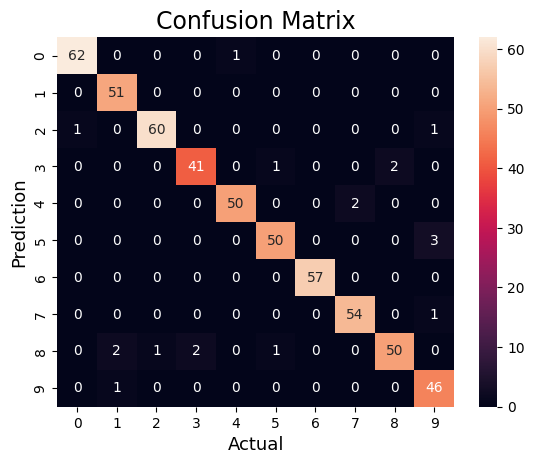

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.94      1.00      0.97        51
           2       0.98      0.97      0.98        62
           3       0.95      0.93      0.94        44
           4       0.98      0.96      0.97        52
           5       0.96      0.94      0.95        53
           6       1.00      1.00      1.00        57
           7       0.96      0.98      0.97        55
           8       0.96      0.89      0.93        56
           9       0.90      0.98      0.94        47

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540



**Explaination:**
Prediction Results: Shows what the model predicted for each digit image in the test dataset.

Accuracy Metrics: Measures how well the model performed overall, usually with metrics like accuracy, precision, recall, and F1-score.

Confusion Matrix: A table visualizing the model's performance, highlighting where it made mistakes in classifying digits.

Visualization of Predictions: Optional visuals of digit images with their predicted labels for a quick glance at the model's performance.

Model Explanation: Simple insights into how the model made its predictions, highlighting important features or pixels.

Error Analysis: Highlights specific cases where the model struggled to classify digits, helping identify areas for improvement.

This concise explanation output provides a clear summary of the model's performance and areas for further analysis or refinement.*italicized text*